In [ ]:
# Multiple regression is used when we want to predict the numerical variable y using more than one predictor
# Here we bulid and evaluate simple linear regression as well as a multiple linear regression models to predict the happiness score (called "Ladder score" in the dataset)   

In [ ]:
# import the essential libraries
# read the data from a csv file and put them into a dataframe 

import pandas as pd
import numpy as np

# https://ourworldindata.org/happiness-and-life-satisfaction
# https://worldhappiness.report/ed/2020/social-environments-for-world-happiness/

df = pd.read_csv('WHR20_DataForFigure2.1.csv')

In [ ]:
# show the first 3 rows of the data

df.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267


In [ ]:
# give the shape of the dataset

df.shape

(153, 20)

In [ ]:
# identify the y variable for simple linear regression 

h_score = df['Ladder score']

In [ ]:
# identify the x variable (predictor) for the simple linear regression model 

log_gdp = df['Logged GDP per capita']

In [ ]:
# import the required data visulaization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 8.0707900885)

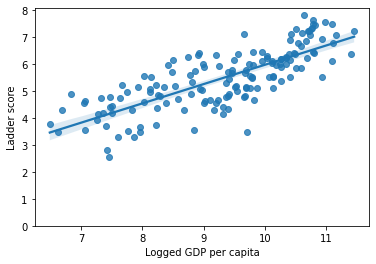

In [ ]:
# Sketch the scatter/regression plot for the specified x and y variables

sns.regplot(x=log_gdp, y=h_score, data=df)
plt.ylim(0,)

In [ ]:
# build the simple linear regression model

from scipy.stats import linregress
slm = linregress(log_gdp, h_score)

In [ ]:
# show the slope and y-intercept of the regression line as a table/dataframe 

pd.DataFrame([slm.slope, slm.intercept],
             index=['Slope', 'Intercept'],
             columns=[''])

,
Slope,0.717738
Intercept,-1.198646


In [ ]:
# import the required stats library

from scipy import stats

In [ ]:
# Calculate the Pearson Correlation Coefficient and the p-value to decide if the correlation is significant 
# p-value < 0.05 indicates that the correlation is significant.
# p-value > 0.05 indicates that the correlation is not significant.

pc, pv = stats.pearsonr(log_gdp, h_score)
print("Pearson Correlation Coefficient:", pc, "p-value:", pv)

Pearson Correlation Coefficient: 0.7753744007526839 p-value: 5.983050790573e-32


In [ ]:
# identify the columns needed for the multiple regression model 
# identify the 6 predictors and the y-variable   

columns = ['Ladder score',
           'Logged GDP per capita',
           'Social support',
           'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity',
           'Perceptions of corruption']
subset=df[columns]
x=df[columns[1:6]]
y=df[columns[0]]

In [ ]:
# show the first 3 rows of the columns used for this model

subset.head(3)

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728


In [ ]:
# give the descriptive statistics for the variables used in this model 

subset.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [ ]:
# build the multiple regression model with 6 predictors 
# print the actual y value, the predicted y value and the difference/error for the first 5 countries in the list

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
ypred =  lm.fit(x,y).predict(x)
for i in range(5):
  print(df['Country name'][i],y[i], ypred[i], y[i]-ypred[i])


Finland 7.808700085 6.774623704820803 1.0340763801791972
Denmark 7.645599842 6.910822063600323 0.7347777783996774
Switzerland 7.559899807 6.959111550600044 0.600788256399956
Iceland 7.504499912 7.079727455535208 0.4247724564647921
Norway 7.487999916 7.062438311959411 0.4255616040405883


In [ ]:
# print the coefficients of the multiple regression model 

lm.coef_

array([0.25662794, 2.4439664 , 0.03870408, 2.04112925, 0.58486174])

In [ ]:
# print the y-intercept of the multiple regression model 

lm.intercept_

-2.9735087852645954

In [ ]:
# print the coefficients of determination (R-square) of the multiple regression model 
# The R-square gives the percentage of variation in y which can explained by the 6 predictors included in the model  

lm.score(x,y)

0.7414688033301148

In [ ]:
# import an essential library 

from sklearn.model_selection import train_test_split

In [ ]:
# split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 122


In [ ]:
# build a linear regression model 

lm1=LinearRegression()

In [ ]:
# fit the training data into the multiple linear regression model

ypred1=lm1.fit(x_train, y_train)

In [ ]:
# get the y-intercept of the model

lm1.intercept_

-3.0461402624979375

In [ ]:
# get the list of coefficients of the model 

lm1.coef_

array([0.25615022, 2.90247569, 0.03824954, 1.68268585, 0.62777985])

In [ ]:
# get the R-square for the training dataset 

lm1.score(x_train, y_train)

0.7663365924462167

In [ ]:
# get the R-square for the testing dataset 

lm1.score(x_test, y_test)

0.567986301178163